# **UAS Aljabar Linear Elementer**

Nama: **Indra Madaharsa** <br>
NIM: **2304130127** <br>
Prodi: **Teknik Informatika, Rombel 3**

Dalam Ujian Akhir ini, kami mengerjakan proyek akhir dengan beberapa soal dan ketentuan berikut:

1. Siapkan 2 foto berwarna mahasiswa. 1 Foto diambil dari sikadu dan 1 foto bebas, sopan dan close up.
2. Ubah 2 foto tersebut ke greyscale dan hitam putih.
3. Ubah 6 foto di atas menjadi matriks.
4. Lakukan proses SVD pada 6 matriks tersebut serta tentukan masing-masing matriks perkaliannya.
5. Implementasikan 6 foto di atas ke dalam PCA, Eigen Value, dan Vector serta SVD.
6. Lakukan Improvisasi dari masing-masing mahasiswa sehingga terjadi perbedaan yang signifikan antara proyek mahasiswa.
7. Berikan komentar, penjelasan dan kesimpulan pada __Google Colab__ atau __Text Editor__ mahasiswa.
8. Jika mahasiswa akan memperbaiki Video UTS, silahkan di upload ulang updatenya dan menghapus file video lama. <br>

Link GD UAS sama dengan link GD UTS. Upload file sesuai dengan Rombel dan kelompok masing-masing. Khusus file UAS, mahasiswa agar membuat folder baru di bawah folder kelompok dengan nama folder berupa **nama-nim mahasiswa**. <br>

Link GD UAS masing-masing mahasiswa yang berisi file UAS agar diupload di elena paling lambat tanggal 12 Juni 2024 pukul 23.59 WIB.

**Pustaka atau _Library_ yang akan digunakan:** 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import utils
import os
from glob import glob
from PIL import Image
from scipy.ndimage import zoom
from sklearn.decomposition import PCA, IncrementalPCA
from skimage import io

**_Library_ dan fungsinya**

1. NumPy (np):

Digunakan untuk operasi matematika dan manipulasi array, termasuk mengubah gambar menjadi matriks dan melakukan operasi seperti Singular Value Decomposition (SVD).

2. Glob (glob):

Digunakan untuk mencari file dalam folder berdasarkan pola tertentu (misalnya, mencari semua file dengan ekstensi .jpg dalam folder).
PIL (Pillow) (Image):

Digunakan untuk membuka, memanipulasi, dan menyimpan gambar. Dalam konteks ini, akan digunakan untuk membuka gambar, mengubah warna gambar (misalnya, ke grayscale dan hitam putih), serta menyimpan hasilnya.

3. Matplotlib (plt):

Digunakan untuk menampilkan gambar dan membuat plot yang diperlukan. Dalam konteks ini, akan digunakan untuk menampilkan gambar-gambar yang telah diubah dan hasil analisis seperti SVD dan PCA.

4. Copy (copy):

Digunakan untuk membuat salinan dari objek Python. Mungkin diperlukan untuk membuat salinan dari gambar atau matriks agar tidak mengubah data asli.

5. Utils (utils):

Library ini tidak standar dan tampaknya berisi fungsi-fungsi khusus yang dibuat untuk proyek ini, seperti fungsi untuk membaca gambar dari folder dan mengubahnya menjadi grid persegi.

6. Scipy.ndimage (zoom):

Library ini digunakan untuk membantu saya dalam zooming atau membesarkan gambar saya (dikarenakan saya tidak memiliki foto yang close up).

7. OS (os)

Digunakan untuk mendapatkan file dalam folder, membuat path ke file dengan menggabungkan folder dan nama file, dan memastikan hanya sejumlah file gambar tertentu saja yang di ambil dari folder.

8. Scikit Learn (sklearn)

Digunakan untuk melakukan dekomposisi dan menghitung eigenvalue, eigenvector, dan covariance matrix menggunakan PCA (Principal Component Analysis) dan Incremental PCA agar mengatasi masalah memori dengan memproses data secara bertahap.

9. Scikit Image (skimage)

Digunakan untuk melakukan kompresi gambar.

### **Soal 1**
Siapkan 2 foto berwarna mahasiswa. 1 Foto diambil dari sikadu dan 1 foto bebas, sopan dan close up.

Pada bagian foto bebas, saya menggunakan _library_ scipy.ndimage untuk membesarkan atau zoom gambar saya dikarenakan saya tidak memenuhi kriteria ke 3 yaitu close up.

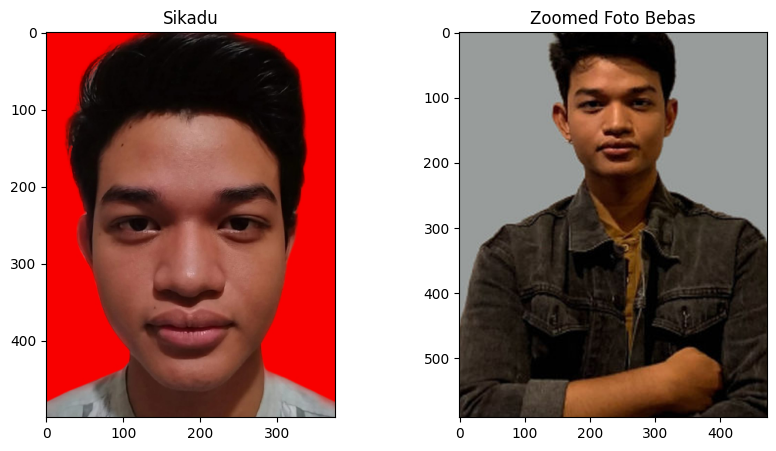

In [9]:
def clipped_zoom(img, zoom_factor, **kwargs):
    h, w = img.shape[:2]
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    if zoom_factor < 1:
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)
    elif zoom_factor > 1:
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
    else:
        out = img
    return out

# Siapkan foto
sikadu_path = 'instructors/sikadu.jpg'
fotoBebas_path = 'instructors/indra.jpg'

sikadu = Image.open(sikadu_path)
fotoBebas = Image.open(fotoBebas_path)

# Zoom image
fotoBebas_np = np.array(fotoBebas)
zmFotoBebas = clipped_zoom(fotoBebas_np, 1.5)

# Tampilkan hasil zoom
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sikadu)
ax[0].set_title('Sikadu')

ax[1].imshow(zmFotoBebas)
ax[1].set_title('Zoomed Foto Bebas')

plt.show()

### **Soal 2**
Ubah 2 foto tersebut ke greyscale dan hitam putih.

Penjelasan mengenai function `convert(L)`:

Dalam pemrosesan gambar, mengonversi gambar dari satu mode warna ke mode warna lainnya, bisa berguna untuk berbagai tujuan. Fungsi convert() dalam pustaka gambar seperti Pillow (Python Imaging Library) memungkinkan Anda mengubah mode gambar. Tiga mode yang disebutkan-RGB, CMYK, dan L-adalah model warna yang berbeda, dan masing-masing memiliki tujuan spesifik:

1. **RGB (Red, Green, Blue):**
	* **Deskripsi**: RGB adalah model warna yang digunakan untuk gambar digital. Ini merepresentasikan warna sebagai kombinasi cahaya merah, hijau, dan biru.
	* **Penggunaan**: Mode ini pada umumnya digunakan untuk gambar yang ditampilkan pada layar (misalnya, monitor komputer, televisi, kamera).

2. **CMYK (Cyan, Magenya, Yellow, Black):**
	* **Deskripsi**: CMYK adalah model warna yang digunakan untuk pencetakan warna. Ini merepresentasikan warna sebagai kombinasi tinta cyan, magenta, kuning, dan hitam.
	* **Penggunaan**: Mode ini digunakan untuk menyiapkan gambar untuk dicetak, di mana pencampuran warna bersifat subtraktif (yaitu, warna diciptakan dengan mengurangi cahaya).

3. **L (Luminance or Grayscale):**
	* **Deskripsi**: Mode L adalah model warna skala abu-abu di mana gambar terdiri atas berbagai warna abu-abu. Tiap piksel merepresentasikan kecerahan atau intensitas cahaya.
	* **Penggunaan**: Mode ini digunakan apabila informasi warna tidak diperlukan, misalnya, pada jenis analisis gambar tertentu, kompresi, atau efek artistik.

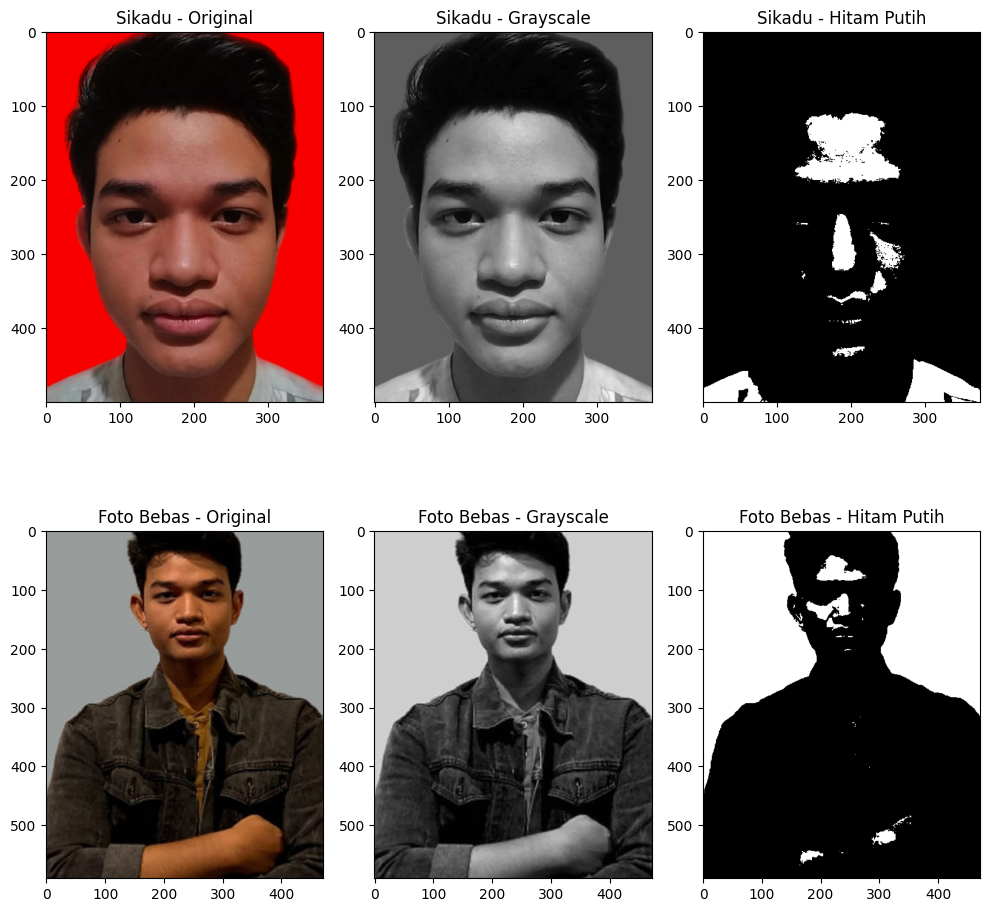

In [38]:
# Convert images to numpy arrays for processing
fotoBebas_np = np.array(fotoBebas)

# Zoom foto bebas
zmFotoBebas_np = clipped_zoom(fotoBebas_np, 1.5)
zmFotoBebas = Image.fromarray(zmFotoBebas_np)

# Ubah ke grayscale dan hitam putih
sikadu_gray = sikadu.convert('L')
fotoBebas_gray = zmFotoBebas.convert('L')

sikadu_bw = sikadu_gray.point(lambda x: 0 if x < 128 else 255, '1')
fotoBebas_bw = fotoBebas_gray.point(lambda x: 0 if x < 128 else 255, '1')

# Tampilkan hasil
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

ax[0, 0].imshow(sikadu)
ax[0, 0].set_title('Sikadu - Original')
ax[0, 1].imshow(sikadu_gray, cmap="gray")
ax[0, 1].set_title('Sikadu - Grayscale')
ax[0, 2].imshow(sikadu_bw, cmap='gray')
ax[0, 2].set_title('Sikadu - Hitam Putih')

ax[1, 0].imshow(zmFotoBebas)
ax[1, 0].set_title('Foto Bebas - Original')
ax[1, 1].imshow(fotoBebas_gray, cmap='gray')
ax[1, 1].set_title('Foto Bebas - Grayscale')
ax[1, 2].imshow(fotoBebas_bw, cmap='gray')
ax[1, 2].set_title('Foto Bebas - Hitam Putih')

plt.tight_layout()
plt.show()


### **Soal 3**
Ubah 6 foto di atas menjadi matriks.

Disini foto yang di maksud adalah foto yang sudah di sediakan oleh file `Case - Study Face Identification.ipynb` dan gambar-gambar nya diambil dari folder instructors.

Disini kita mengambil hasil matrix dari 6 gambar tersebut berdasarkan ukuran file gambar nya, yaitu 300 x 300 menggunakan `.shape` mungkin akan ada pertanyaan, mengapa tidak menggunakan `.nbytes`? dikarenakan jika menggunakan `.nbytes` yang akan di dapatkan hanya ordo 1 x 1 dan tidak 1 x 2. Pada bagian ini juga saya harus menambahkan konversi warna gambar, dikarenakan hasil yang di berikan akan tidak sesuai dengan ordo yang lain. Image yang asli memberikan 3 ordo, sementara grayscale dan hitam putih memberikan 2 ordo, maka dari itu saya harus jadikan ini grayscale agar sesuai.

In [62]:

# Simpan gambar yang telah diubah ke dalam list all_faces
all_faces = [
    np.array(sikadu.convert('L')), 
    np.array(zmFotoBebas.convert('L')), 
    np.array(sikadu_gray), 
    np.array(fotoBebas_gray),
    np.array(sikadu_bw.convert('L')), 
    np.array(fotoBebas_bw.convert('L'))
]

# Convert the images to matrices
image_matrices = [np.array(img) for img in all_faces]

# Display the shape of each matrix to confirm
for idx, img_matrix in enumerate(image_matrices):
    print(f"Shape of image {idx+1}: {img_matrix.shape}")

Shape of image 1: (500, 375)
Shape of image 2: (591, 472)
Shape of image 3: (500, 375)
Shape of image 4: (591, 472)
Shape of image 5: (500, 375)
Shape of image 6: (591, 472)


### **Soal 4**
Lakukan proses SVD pada 6 matriks tersebut serta tentukan masing-masing matriks perkaliannya.

Kode di bawah ini melakukan looping pada hasil dari ukuran matriks 6 gambar tersebut, dan melakukan perhitungan SVD dengan fungsi yang disediakan dari `np.linalg` yang bernama `svd`. Dari sini, kita menghitung hasil dari:

- U = matriks dari vektor eigen ortonormal dari AAᵀ
- VT =  transpos matriks yang mengandung vektor eigen ortonormal dari Aᵀ A
- S / Sigma = matriks diagonal dengan r elemen sama dengan akar nilai eigen positif AAᵀ atau Aᵀ A (kedua matriks memiliki nilai eigen positif yang sama).

In [66]:
# Perform SVD on each image matrix and calculate their product
svd_results = []

for idx, img_matrix in enumerate(all_faces):
    U, S, VT = np.linalg.svd(img_matrix, full_matrices=False)
    S_matrix = np.diag(S)
    reconstructed_matrix = np.dot(U, np.dot(S_matrix, VT))
    svd_results.append((U, S_matrix, VT, reconstructed_matrix))
    print(f"Image {idx+1} - Shapes of U, S, VT, and Reconstructed Matrix:")
    print(f"U: {U.shape}, S: {S_matrix.shape}, VT: {VT.shape}, Reconstructed: {reconstructed_matrix.shape}")

    # Ensure the reconstruction is close to the original
    if np.allclose(img_matrix, reconstructed_matrix):
        print(f"Image {idx+1} successfully reconstructed.\n")
    else:
        print(f"Image {idx+1} reconstruction failed.\n")

# Now svd_results contains the SVD components and reconstructed matrices for each image

Image 1 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (500, 375), S: (375, 375), VT: (375, 375), Reconstructed: (500, 375)
Image 1 successfully reconstructed.

Image 2 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (591, 472), S: (472, 472), VT: (472, 472), Reconstructed: (591, 472)
Image 2 successfully reconstructed.

Image 3 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (500, 375), S: (375, 375), VT: (375, 375), Reconstructed: (500, 375)
Image 3 successfully reconstructed.

Image 4 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (591, 472), S: (472, 472), VT: (472, 472), Reconstructed: (591, 472)
Image 4 successfully reconstructed.

Image 5 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (500, 375), S: (375, 375), VT: (375, 375), Reconstructed: (500, 375)
Image 5 successfully reconstructed.

Image 6 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (591, 472), S: (472, 472), VT: (472, 472), Reconstructed: (591, 472)
Image 6 successfully reconstructed.



### **Soal 5**
Implementasikan 6 foto di atas ke dalam PCA, Eigen Value, dan Vector serta SVD.

Berikut adalah penggunaan PCA, Eigen Value, Vector, dan SVD dari 6 gambar yang ada di atas.

Disini saya melakukan PCA dan Vector dalam membantu pembuatan Eigen Faces, yang dimana hasil gambar nya seakan berbayang. Sementara pada penggunaan SVD, saya menggunakan metode penghasilan matrix dahulu dengan menggunakan U / Vektor, Vt / Transpose Matrix , dan S / Sigma untuk menghasilkan kompresi gambar yang dimana hasilnya menjadi buram berdasarkan variabel array K.

Pada bagian Eigenfaces ada gambar yang tidak berhasil di load dikarenakan eigenvalue melebihi maksimal matrix nya atau bisa disebut juga overflow.

PCA Components:
 [[ 3.61868860e-03  3.61868860e-03  3.61868860e-03 ...  4.61232040e-04
   5.31614020e-04  6.01586486e-04]
 [-1.70162510e-04 -1.70162510e-04 -1.70162510e-04 ...  4.86316361e-03
   4.88032408e-03  4.82603606e-03]
 [-1.62428607e-03 -1.62428607e-03 -1.62428608e-03 ...  3.35539784e-03
   3.44418086e-03  3.59834091e-03]
 [-6.89879383e-01  7.23790750e-01 -1.52235971e-03 ...  2.45375051e-05
  -3.76712010e-05 -3.09726589e-05]
 [ 7.23681074e-01  6.89991592e-01  1.28061616e-03 ... -1.96689919e-05
   4.16962394e-05  4.14462042e-05]] 

PCA Eigenvalues:
 [3.64404647e+08 2.08936483e+08 1.95008447e+03 3.45787370e-20
 8.91924779e-21] 

PCA Mean:
 [76.5        76.5        76.5        ... 55.16666667 56.83333333
 57.83333333] 



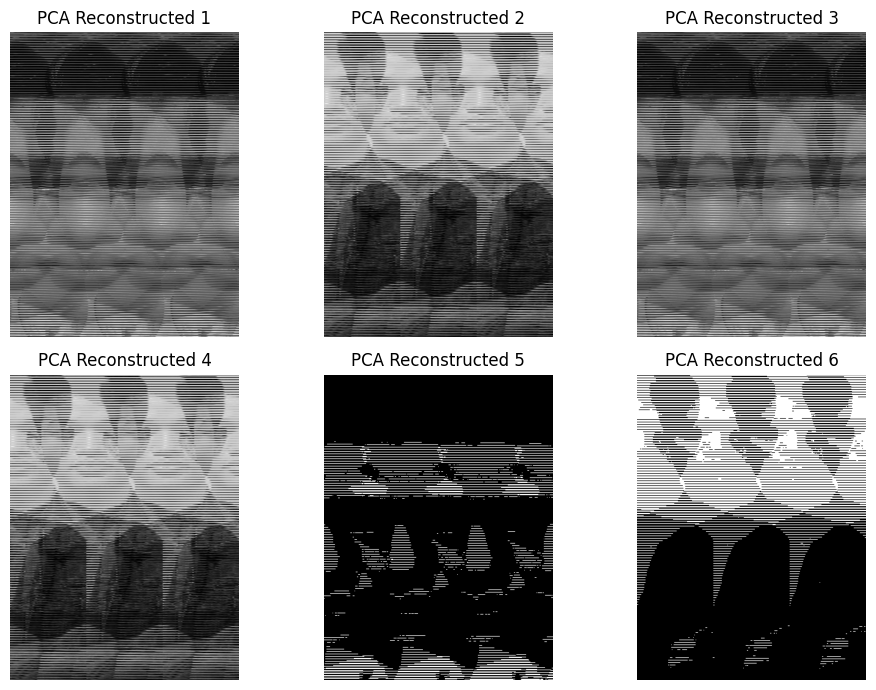

Eigenvalues of the Covariance Matrix:
 [3.64404647e+08 2.08936483e+08 1.95008447e+03 3.45425194e-20
 8.92605136e-21 4.92950857e-25]
Eigenvectors of the Covariance Matrix:
 [[-3.61868860e-03 -1.70162510e-04 -1.62428607e-03  6.90294094e-01
  -7.23424816e-01 -7.77050772e-03]
 [-3.61868860e-03 -1.70162510e-04 -1.62428607e-03 -7.23477099e-01
  -6.90322098e-01  4.64342843e-04]
 [-3.61868860e-03 -1.70162510e-04 -1.62428608e-03  1.52581079e-03
  -1.28274539e-03  1.44707181e-01]
 ...
 [-4.61232040e-04  4.86316361e-03  3.35539784e-03 -2.46519072e-05
   1.97419979e-05  1.56055577e-03]
 [-5.31614020e-04  4.88032408e-03  3.44418086e-03  3.76766818e-05
  -4.16733979e-05  2.22622832e-03]
 [-6.01586486e-04  4.82603606e-03  3.59834091e-03  3.09233202e-05
  -4.13677616e-05 -2.01620950e-03]]


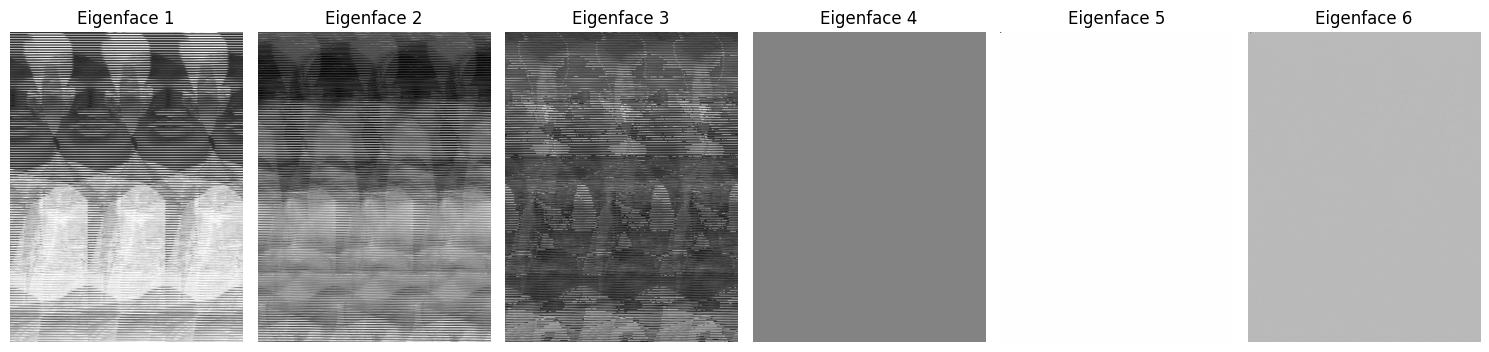

Image 1 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (375, 375), S: (375, 375), VT: (375, 500), Reconstructed: (375, 500)

Image 1 successfully reconstructed.

Image 2 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (375, 375), S: (375, 375), VT: (375, 500), Reconstructed: (375, 500)

Image 2 successfully reconstructed.

Image 3 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (375, 375), S: (375, 375), VT: (375, 500), Reconstructed: (375, 500)

Image 3 successfully reconstructed.

Image 4 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (375, 375), S: (375, 375), VT: (375, 500), Reconstructed: (375, 500)

Image 4 successfully reconstructed.

Image 5 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (375, 375), S: (375, 375), VT: (375, 500), Reconstructed: (375, 500)

Image 5 successfully reconstructed.

Image 6 - Shapes of U, S, VT, and Reconstructed Matrix:
U: (375, 375), S: (375, 375), VT: (375, 500), Reconstructed: (375, 500)

Image 6 successfully reconstructed.



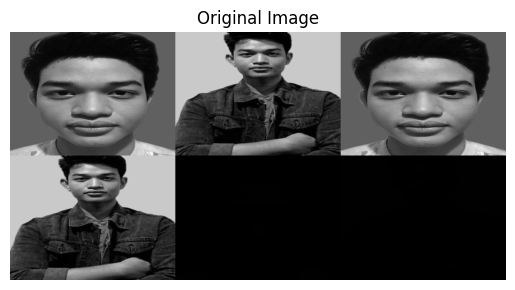

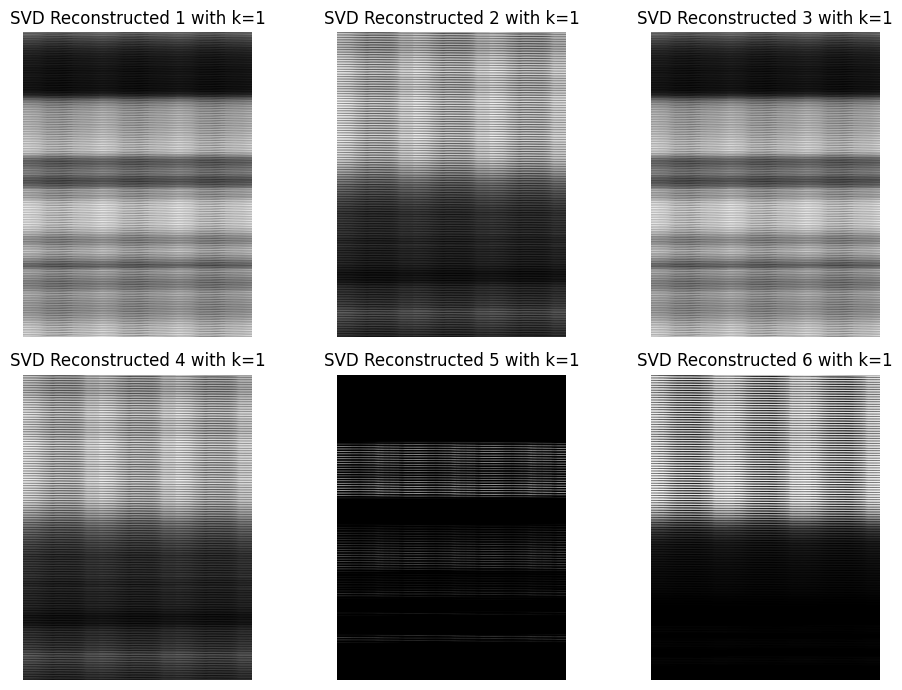

Original memory size: 1125000 bytes
Compressed memory size with k=1: 42048 bytes
Compression ratio with k=1: 0.04


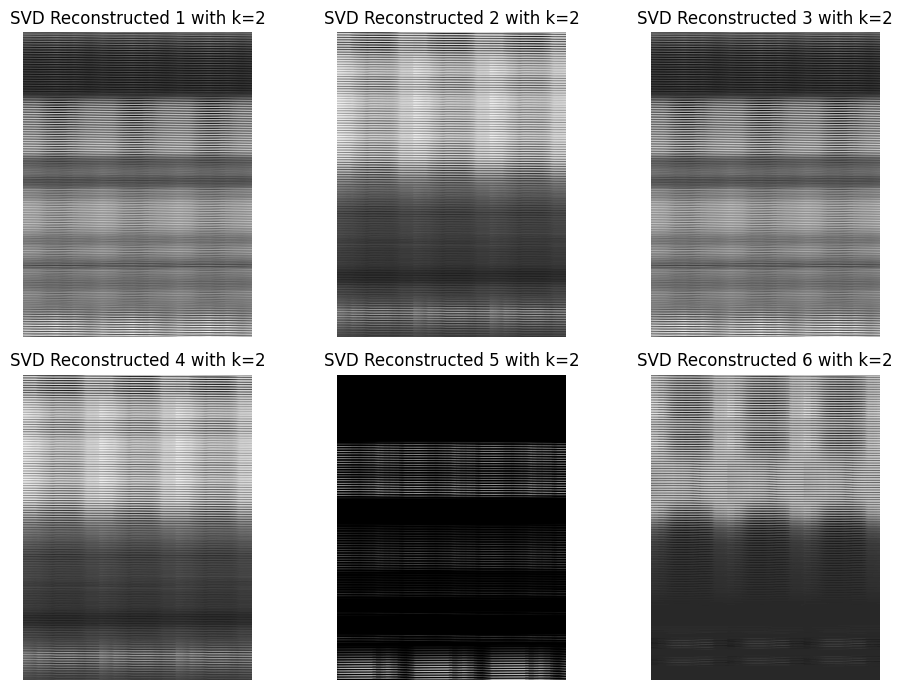

Original memory size: 1125000 bytes
Compressed memory size with k=2: 84096 bytes
Compression ratio with k=2: 0.07


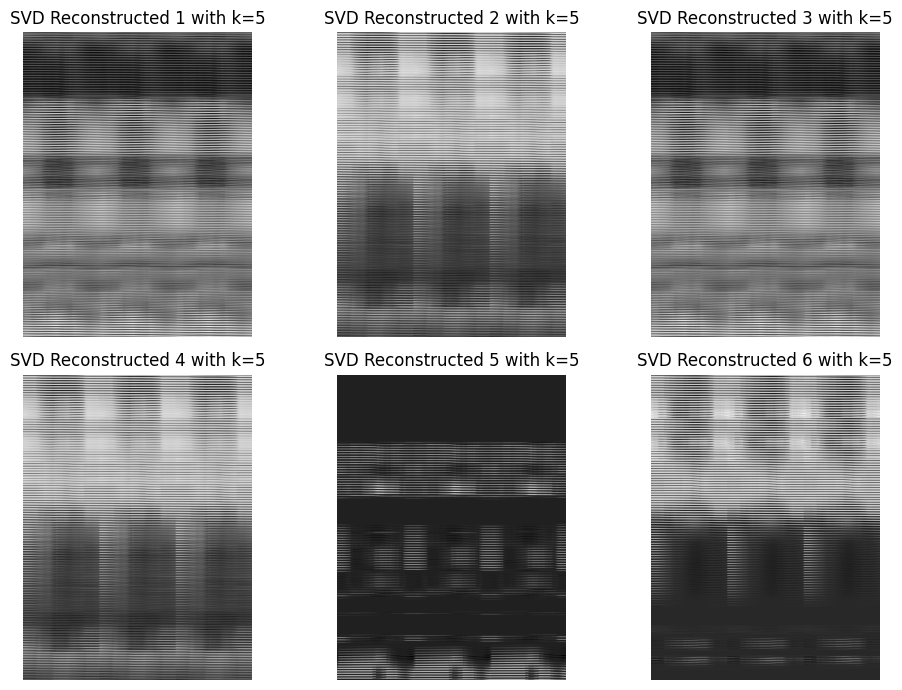

Original memory size: 1125000 bytes
Compressed memory size with k=5: 210240 bytes
Compression ratio with k=5: 0.19


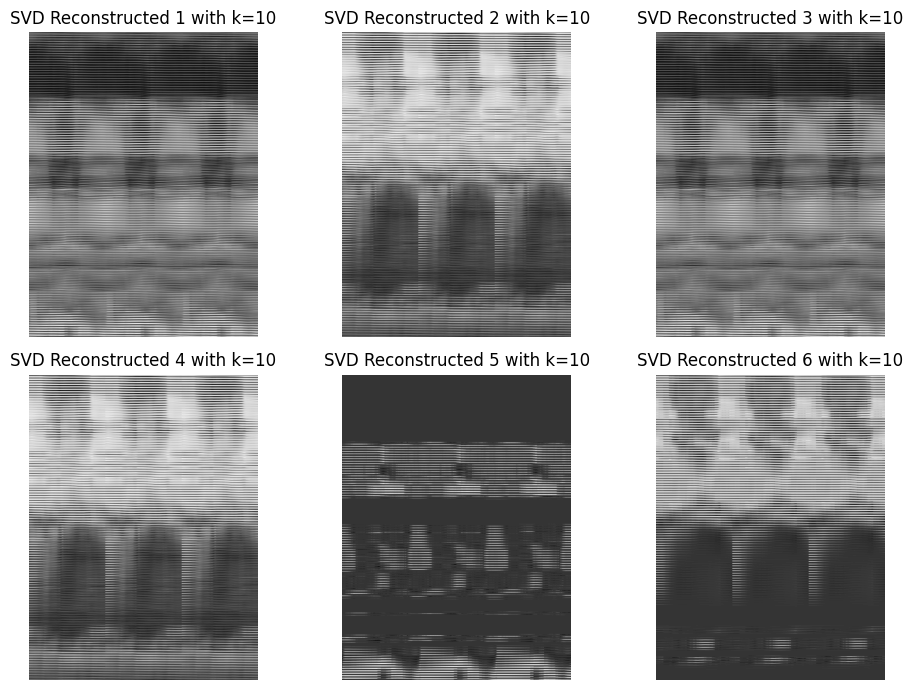

Original memory size: 1125000 bytes
Compressed memory size with k=10: 420480 bytes
Compression ratio with k=10: 0.37


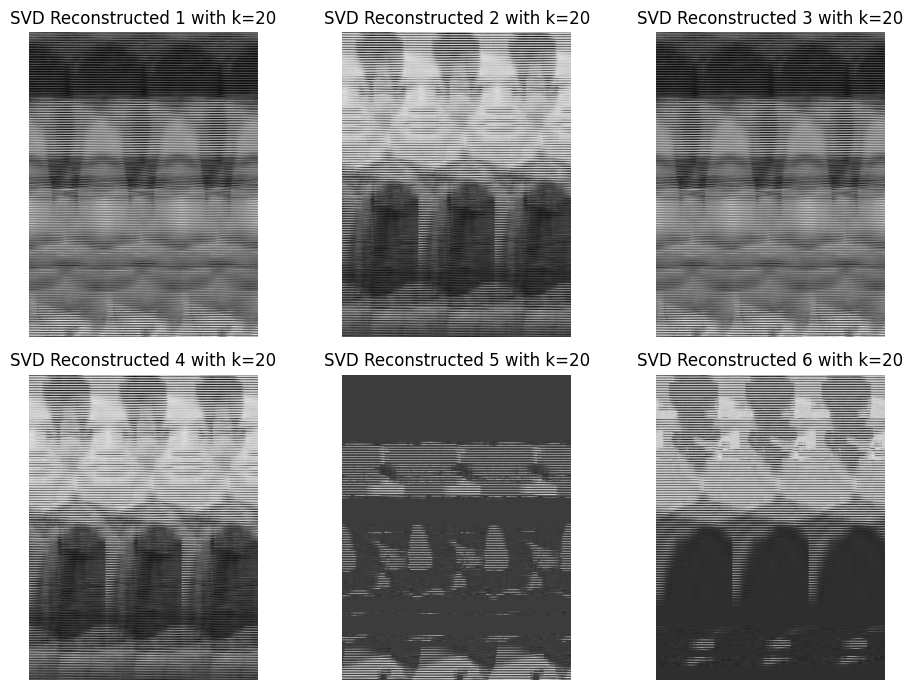

Original memory size: 1125000 bytes
Compressed memory size with k=20: 840960 bytes
Compression ratio with k=20: 0.75


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from PIL import Image

# Fungsi untuk menampilkan gambar
def display_image(image, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Fungsi untuk menghitung ukuran memori
def calculate_memory_size(U, S, VT, k):
    memory_size = (U[:, :k].nbytes + S[:k].nbytes + VT[:k, :].nbytes)
    return memory_size

# Fungsi untuk mengkompres gambar menggunakan SVD
def compress_image(U, S, VT, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), VT[:k, :]))

# Simpan gambar yang telah diubah ke dalam list all_faces
all_faces = [sikadu.convert('L'), zmFotoBebas.convert('L'), 
             sikadu_gray, fotoBebas_gray,
             sikadu_bw, fotoBebas_bw]

# Konversi gambar ke array numpy dengan ukuran yang seragam
target_size = (500, 375)  # Ubah ukuran target sesuai kebutuhan Anda
image_matrices = [np.array(img.resize(target_size)) for img in all_faces]

# Flatten the images for PCA
flattened_images = np.array([img.flatten() for img in image_matrices])

# Perform IncrementalPCA to avoid memory issues
ipca = IncrementalPCA(n_components=5)
ipca.fit(flattened_images)
ipca_components = ipca.components_
ipca_eigenvalues = ipca.explained_variance_
ipca_mean = ipca.mean_

print("PCA Components:\n", ipca_components, "\n")
print("PCA Eigenvalues:\n", ipca_eigenvalues, "\n")
print("PCA Mean:\n", ipca_mean, "\n")

# Reconstruct images using PCA
pca_reconstructed_images = ipca.inverse_transform(ipca.transform(flattened_images))
pca_reconstructed_images = [img.reshape(target_size) for img in pca_reconstructed_images]

# Display reconstructed images from PCA
fig, axs = plt.subplots(2, 3, figsize=(10, 7))
axs = axs.flatten()

for idx, img in enumerate(pca_reconstructed_images):
    axs[idx].imshow(img, cmap='gray')
    axs[idx].set_title(f'PCA Reconstructed {idx+1}')
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

# Perform SVD on the centered data
flattened_images_centered = flattened_images - np.mean(flattened_images, axis=0)
U, S, VT = np.linalg.svd(flattened_images_centered, full_matrices=False)
eigvals = S**2 / (len(flattened_images) - 1)
eigvecs = VT.T

print("Eigenvalues of the Covariance Matrix:\n", eigvals)
print("Eigenvectors of the Covariance Matrix:\n", eigvecs)

# Display some of the eigenfaces
num_eigenfaces_to_display = 6
eigenfaces = eigvecs[:, :num_eigenfaces_to_display].T

fig, axs = plt.subplots(1, num_eigenfaces_to_display, figsize=(15, 5))
for i in range(num_eigenfaces_to_display):
    eigenface = eigenfaces[i].reshape(target_size)
    # Normalize eigenface for better visibility
    eigenface -= eigenface.min()
    eigenface /= eigenface.max()
    axs[i].imshow(eigenface, cmap='gray')
    axs[i].set_title(f'Eigenface {i+1}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Perform SVD on each image matrix and calculate their product
svd_results = []

for idx, img_matrix in enumerate(image_matrices):
    U, S, VT = np.linalg.svd(img_matrix, full_matrices=False)
    S_matrix = np.diag(S)
    reconstructed_matrix = np.dot(U, np.dot(S_matrix, VT))
    svd_results.append((U, S_matrix, VT, reconstructed_matrix))
    print(f"Image {idx+1} - Shapes of U, S, VT, and Reconstructed Matrix:")
    print(f"U: {U.shape}, S: {S_matrix.shape}, VT: {VT.shape}, Reconstructed: {reconstructed_matrix.shape}\n")

    # Ensure the reconstruction is close to the original
    if np.allclose(img_matrix, reconstructed_matrix):
        print(f"Image {idx+1} successfully reconstructed.\n")
    else:
        print(f"Image {idx+1} reconstruction failed.\n")

# Display the Original Image
grid_im = np.vstack([np.hstack(image_matrices[i*3:(i+1)*3]) for i in range(2)])
plt.imshow(grid_im, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Nilai k yang lebih kecil untuk menghasilkan gambar buram
ks = [1, 2, 5, 10, 20]

# Display reconstructed images from SVD with different k values
for k in ks:
    fig, axs = plt.subplots(2, 3, figsize=(10, 7))
    axs = axs.flatten()

    for idx, (U, S_matrix, VT, _) in enumerate(svd_results):
        compressed_image = compress_image(U, np.diag(S_matrix), VT, k).reshape(target_size)
        axs[idx].imshow(compressed_image, cmap='gray')
        axs[idx].set_title(f'SVD Reconstructed {idx+1} with k={k}')
        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

    # Bandingkan ukuran memori data asli dan terkompresi
    original_memory_size = sum(img.nbytes for img in image_matrices)
    compressed_memory_size = sum(calculate_memory_size(U, np.diag(S_matrix), VT, k) for U, S_matrix, VT, _ in svd_results)

    print(f'Original memory size: {original_memory_size} bytes')
    print(f'Compressed memory size with k={k}: {compressed_memory_size} bytes')
    print(f'Compression ratio with k={k}: {compressed_memory_size / original_memory_size:.2f}')


### **Soal 6**
Lakukan Improvisasi dari masing-masing mahasiswa sehingga terjadi perbedaan yang signifikan antara proyek mahasiswa.

Improvisasi yang saya lakukan disini adalah mengkompresi gambar menggunakan SVD, tetapi mengubah gambar nya agar tetap menjadi L (Luminance atau Grayscale). Tetapi, pada saat pemanggilan gambar tersebut, saya tidak menggunakan `cmap='gray'` sehingga warna yang dihasilkan dari parameter kode tersebut adalah warna kehijauan. Setelah terubah warna nya, baru saya kompres gambar nya menggunakan metode SVD dengan kualitas tertentu.

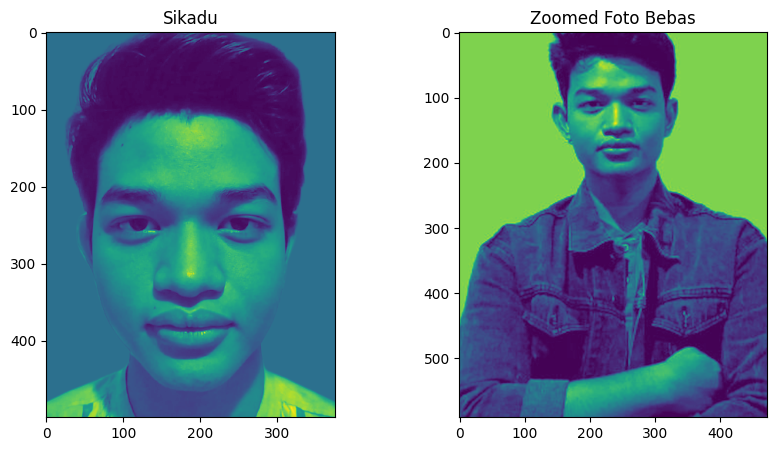

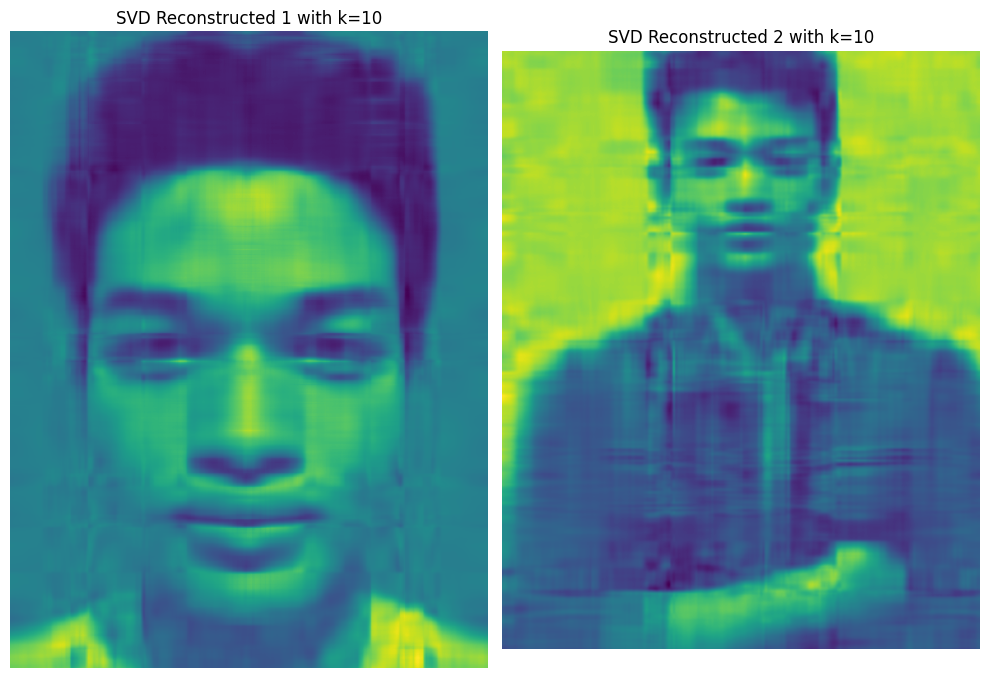

Original memory size: 375000 bytes
Compressed memory size with k=10: 155200 bytes
Compression ratio with k=10: 0.41


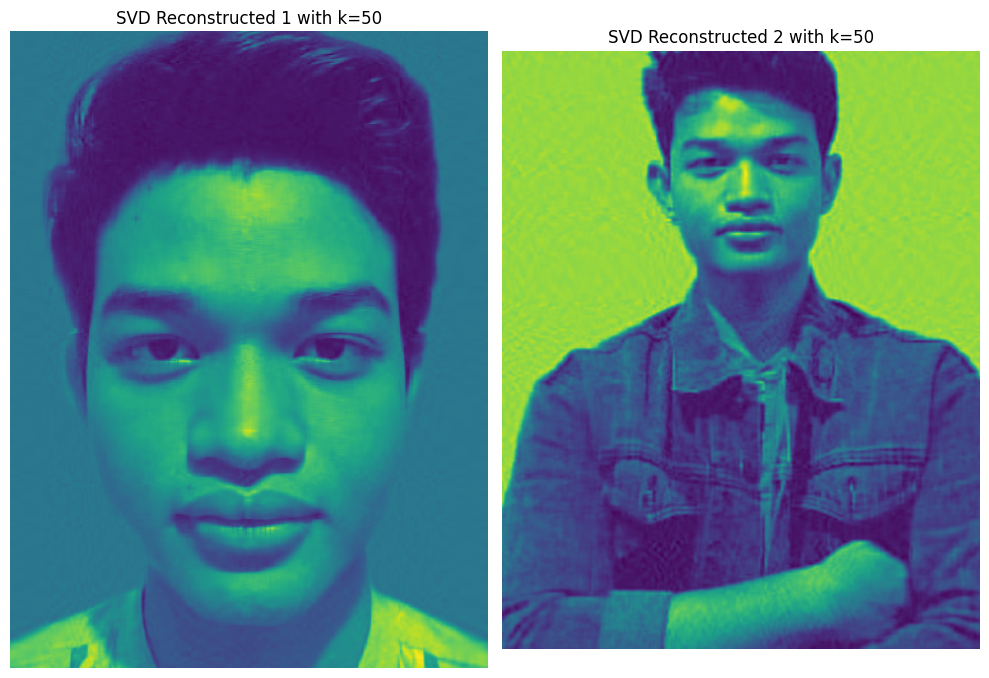

Original memory size: 375000 bytes
Compressed memory size with k=50: 776000 bytes
Compression ratio with k=50: 2.07


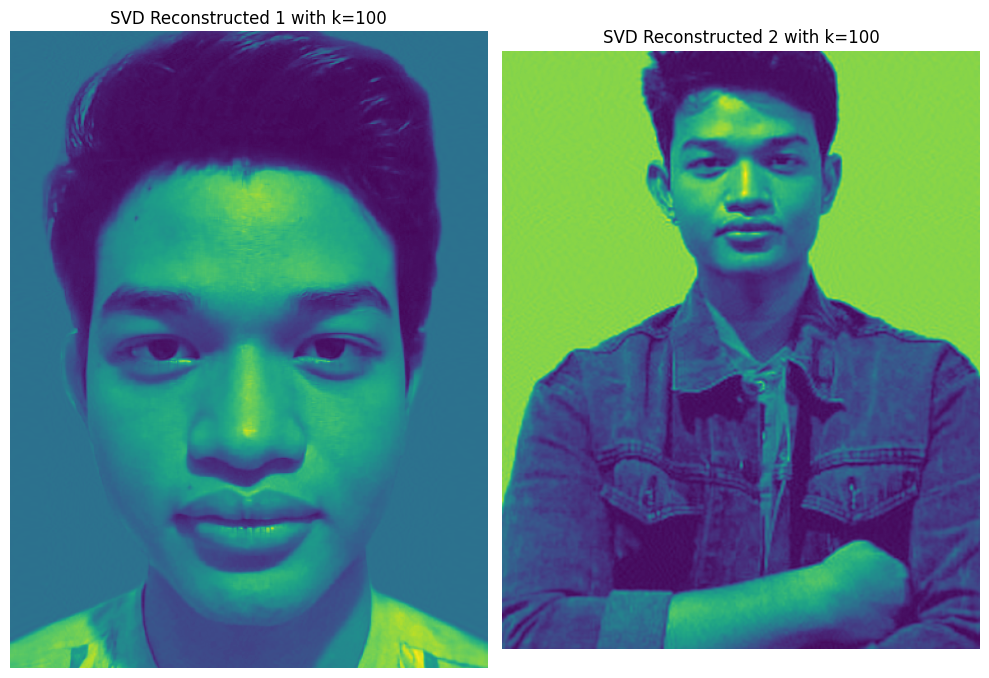

Original memory size: 375000 bytes
Compressed memory size with k=100: 1552000 bytes
Compression ratio with k=100: 4.14


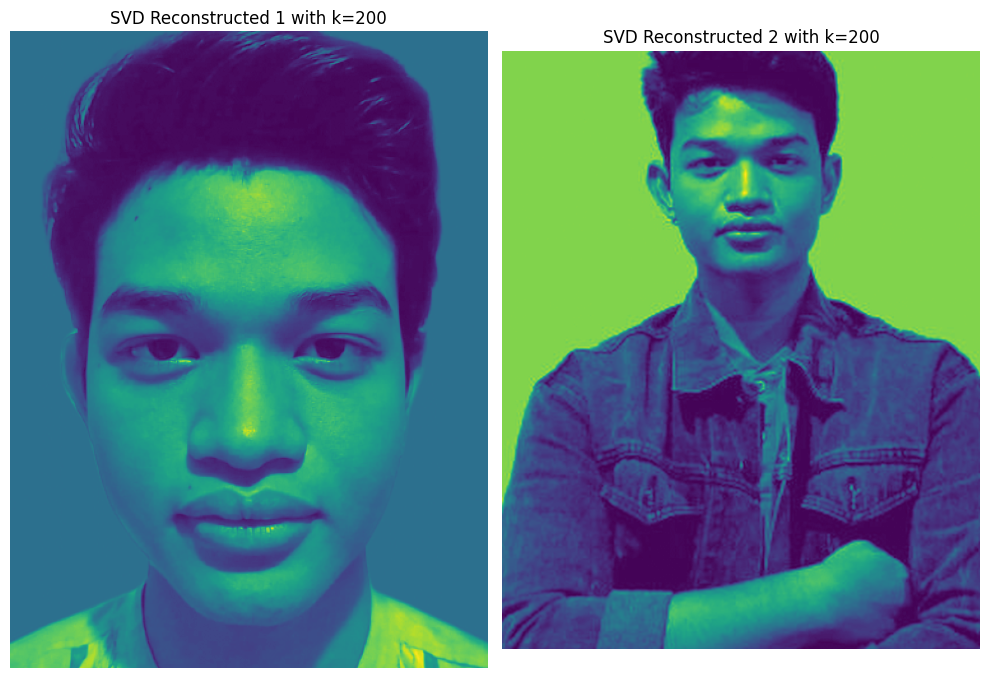

Original memory size: 375000 bytes
Compressed memory size with k=200: 3104000 bytes
Compression ratio with k=200: 8.28


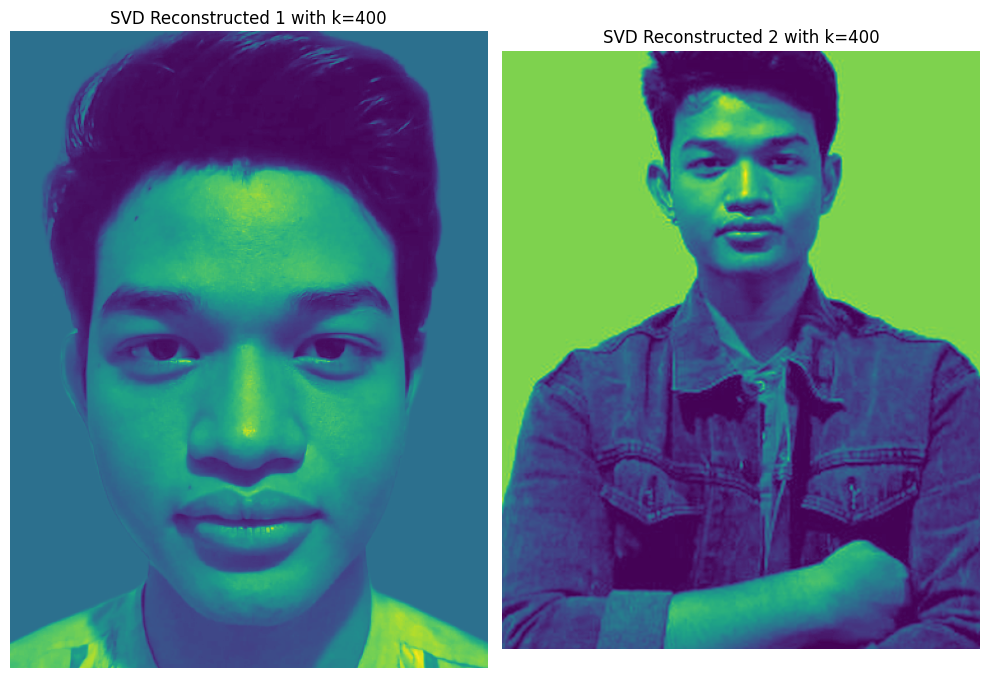

Original memory size: 375000 bytes
Compressed memory size with k=400: 6032800 bytes
Compression ratio with k=400: 16.09


In [ ]:
# Fungsi untuk melakukan kompresi gambar menggunakan SVD
def compress_image(U, S, VT, k):
    # Ubah S menjadi matriks diagonal
    S_diag = np.zeros((min(U.shape[0], VT.shape[1]), min(U.shape[0], VT.shape[1])))
    if k <= min(U.shape[0], VT.shape[1]):
        S_diag[:k, :k] = np.diag(S[:k])
    else:
        S_diag[:min(U.shape[0], VT.shape[1]), :min(U.shape[0], VT.shape[1])] = np.diag(S[:min(U.shape[0], VT.shape[1])])
    
    # Lakukan perkalian untuk rekonstruksi gambar
    compressed_image = np.dot(U[:, :min(U.shape[0], VT.shape[1])], np.dot(S_diag, VT[:min(U.shape[0], VT.shape[1]), :]))
    return compressed_image


# Zoom image
fotoBebas_np = np.array(fotoBebas)
zmFotoBebas = clipped_zoom(fotoBebas_np, 1.5)

# Ubah ke grayscale
sikadu_gray = sikadu.convert('L')
fotoBebas_gray = Image.fromarray(np.uint8(zmFotoBebas)).convert('L')

# Tampilkan hasil zoom
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sikadu_gray)
ax[0].set_title('Sikadu')

ax[1].imshow(fotoBebas_gray)
ax[1].set_title('Zoomed Foto Bebas')

plt.show()

ks = [10, 50, 100, 200, 400]  # Misalnya, pilih beberapa nilai k untuk kompresi
image_matrices = [np.array(sikadu_gray), np.array(fotoBebas_gray)]  # Gunakan gambar yang sudah diubah ke grayscale

svd_results = []  # Simpan hasil SVD untuk setiap gambar
for image_matrix in image_matrices:
    U, S_matrix, VT = np.linalg.svd(image_matrix, full_matrices=False)
    svd_results.append((U, S_matrix, VT, image_matrix))

for k in ks:
    fig, axs = plt.subplots(1, 2, figsize=(10, 7))
    axs = axs.flatten()

    for idx, (U, S_matrix, VT, _) in enumerate(svd_results):
        compressed_image = compress_image(U, S_matrix, VT, k)
        axs[idx].imshow(compressed_image)
        axs[idx].set_title(f'SVD Reconstructed {idx+1} with k={k}')
        axs[idx].axis('off')

    plt.tight_layout()
    plt.show()

    # Bandingkan ukuran memori data asli dan terkompresi
    original_memory_size = image_matrices[0].nbytes * len(image_matrices)
    compressed_memory_size = sum(calculate_memory_size(U, S_matrix, VT, k) for U, S_matrix, VT, _ in svd_results)

    print(f'Original memory size: {original_memory_size} bytes')
    print(f'Compressed memory size with k={k}: {compressed_memory_size} bytes')
    print(f'Compression ratio with k={k}: {compressed_memory_size / original_memory_size:.2f}')


Bisa dilihat dari gambar di atas, maka **semakin besar nilai ks nya, maka semakin tajam juga hasil dari kompresi foto nya**.

### **Soal 7**
Berikan komentar, penjelasan dan kesimpulan pada __Google Colab__ atau __Text Editor__ mahasiswa.

Pada soal ini lebih ke ketentuan yang harus dilakukan di projek ini, dan saya sudah **memenuhi** kondisi ini.

### **Soal 8** 
Jika mahasiswa akan memperbaiki Video UTS, silahkan di upload ulang updatenya dan menghapus file video lama.

Untuk bagian ini, kami dari kelompok 6 sudah melakukan revisi dan sudah meng-input ulang video hasil revisi kami